In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pickle


In [10]:
file_path = 'data/all_data.csv'
data = pd.read_csv(file_path)
data.head()

,artists,duration_ms_x,explicit,id_x,name,popularity,search_query,analysis_channels,analysis_sample_rate,duration,...,liveness,loudness_y,mode_y,speechiness,tempo_y,time_signature_y,track_href,type,uri,valence
0,"2 Chainz, Travis Scott",255560,True,1nX9KhK3Fff27SnrIor2Yb,4 AM,72,2 chainz 4 am,1,22050,255.56000,...,0.1550,-7.210,1,0.425,75.012,4,https://api.spotify.com/v1/tracks/1nX9KhK3Fff2...,audio_features,spotify:track:1nX9KhK3Fff27SnrIor2Yb,0.227
1,"2 Chainz, Ty Dolla $ign, Trey Songz, Jhene Aiko",210200,True,6H0AwSQ20mo62jGlPGB8S6,It's A Vibe,76,2 chainz it's a vibe,1,22050,210.20000,...,0.1140,-7.384,1,0.147,73.003,4,https://api.spotify.com/v1/tracks/6H0AwSQ20mo6...,audio_features,spotify:track:6H0AwSQ20mo62jGlPGB8S6,0.523
2,"2 Chainz, YG, Offset",234666,True,365wwIjijQdlRJEjUWTidq,PROUD,61,2 chainz proud,1,22050,234.66667,...,0.1440,-4.301,0,0.356,173.949,4,https://api.spotify.com/v1/tracks/365wwIjijQdl...,audio_features,spotify:track:365wwIjijQdlRJEjUWTidq,0.908
3,"2 Chainz, Drake, Quavo",225893,True,5S1IUPueD0xE0vj4zU3nSf,Bigger Than You (feat. Drake & Quavo),75,"2 chainz, drake bigger > you",1,22050,225.89333,...,0.4460,-6.246,1,0.271,141.009,4,https://api.spotify.com/v1/tracks/5S1IUPueD0xE...,audio_features,spotify:track:5S1IUPueD0xE0vj4zU3nSf,0.264
4,21 Savage,220306,True,2fQrGHiQOvpL9UgPvtYy6G,Bank Account,83,21 savage bank account,1,22050,220.30667,...,0.0871,-8.228,0,0.351,75.016,4,https://api.spotify.com/v1/tracks/2fQrGHiQOvpL...,audio_features,spotify:track:2fQrGHiQOvpL9UgPvtYy6G,0.376


## Need to do some EDA
1. What is the distribution of songs
2. who are the most popular and who are the least popular artists
3. what currently is the most correlated with the number of weeks a song is in the billboards
    - hey have i considered the time that the song has been released? because it doesnt give new songs that chance to have the same amount of time as older songs!!!!!

In [11]:
data.columns

Index(['artists', 'duration_ms_x', 'explicit', 'id_x', 'name', 'popularity',
       'search_query', 'analysis_channels', 'analysis_sample_rate', 'duration',
       'end_of_fade_in', 'id_y', 'key_x', 'key_confidence', 'loudness_x',
       'mode_x', 'mode_confidence', 'num_samples', 'offset_seconds',
       'sample_md5', 'start_of_fade_out', 'tempo_x', 'tempo_confidence',
       'time_signature_x', 'time_signature_confidence', 'window_seconds',
       'acousticness', 'analysis_url', 'danceability', 'duration_ms_y',
       'energy', 'id', 'instrumentalness', 'key_y', 'liveness', 'loudness_y',
       'mode_y', 'speechiness', 'tempo_y', 'time_signature_y', 'track_href',
       'type', 'uri', 'valence'],
      dtype='object')

In [12]:
# seems like I have some repeat columns so I'm going to drop those

drop_repeats = [column for column in data.columns if '_y' in column]
# there is an extra id column so adding that to the list
drop_repeats.append('id')
drop_repeats
data.drop(drop_repeats, axis=1, inplace=True)
data.columns

Index(['artists', 'duration_ms_x', 'explicit', 'id_x', 'name', 'popularity',
       'search_query', 'analysis_channels', 'analysis_sample_rate', 'duration',
       'end_of_fade_in', 'key_x', 'key_confidence', 'loudness_x', 'mode_x',
       'mode_confidence', 'num_samples', 'offset_seconds', 'sample_md5',
       'start_of_fade_out', 'tempo_x', 'tempo_confidence', 'time_signature_x',
       'time_signature_confidence', 'window_seconds', 'acousticness',
       'analysis_url', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'track_href', 'type', 'uri', 'valence'],
      dtype='object')

In [13]:
rename_columns = [column.replace('_x', '') for column in data.columns]

data.columns = rename_columns
# checking my work
data.columns

Index(['artists', 'duration_ms', 'explicit', 'id', 'name', 'popularity',
       'search_query', 'analysis_channels', 'analysis_sample_rate', 'duration',
       'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode',
       'mode_confidence', 'num_samples', 'offset_seconds', 'sample_md5',
       'start_of_fade_out', 'tempo', 'tempo_confidence', 'time_signature',
       'time_signature_confidence', 'window_seconds', 'acousticness',
       'analysis_url', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'track_href', 'type', 'uri', 'valence'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 36 columns):
artists                      837 non-null object
duration_ms                  837 non-null int64
explicit                     837 non-null bool
id                           837 non-null object
name                         837 non-null object
popularity                   837 non-null int64
search_query                 837 non-null object
analysis_channels            837 non-null int64
analysis_sample_rate         837 non-null int64
duration                     837 non-null float64
end_of_fade_in               837 non-null float64
key                          837 non-null int64
key_confidence               837 non-null float64
loudness                     837 non-null float64
mode                         837 non-null int64
mode_confidence              837 non-null float64
num_samples                  837 non-null int64
offset_seconds               837 non-null int64
sample_md5        

In [15]:
# sample_md5 is missing values so I should drop that 

data.drop('sample_md5', axis=1, inplace=True)

In [16]:
data.head()

,artists,duration_ms,explicit,id,name,popularity,search_query,analysis_channels,analysis_sample_rate,duration,...,analysis_url,danceability,energy,instrumentalness,liveness,speechiness,track_href,type,uri,valence
0,"2 Chainz, Travis Scott",255560,True,1nX9KhK3Fff27SnrIor2Yb,4 AM,72,2 chainz 4 am,1,22050,255.56000,...,https://api.spotify.com/v1/audio-analysis/1nX9...,0.796,0.500,0.000000,0.1550,0.425,https://api.spotify.com/v1/tracks/1nX9KhK3Fff2...,audio_features,spotify:track:1nX9KhK3Fff27SnrIor2Yb,0.227
1,"2 Chainz, Ty Dolla $ign, Trey Songz, Jhene Aiko",210200,True,6H0AwSQ20mo62jGlPGB8S6,It's A Vibe,76,2 chainz it's a vibe,1,22050,210.20000,...,https://api.spotify.com/v1/audio-analysis/6H0A...,0.822,0.505,0.000911,0.1140,0.147,https://api.spotify.com/v1/tracks/6H0AwSQ20mo6...,audio_features,spotify:track:6H0AwSQ20mo62jGlPGB8S6,0.523
2,"2 Chainz, YG, Offset",234666,True,365wwIjijQdlRJEjUWTidq,PROUD,61,2 chainz proud,1,22050,234.66667,...,https://api.spotify.com/v1/audio-analysis/365w...,0.781,0.810,0.000000,0.1440,0.356,https://api.spotify.com/v1/tracks/365wwIjijQdl...,audio_features,spotify:track:365wwIjijQdlRJEjUWTidq,0.908
3,"2 Chainz, Drake, Quavo",225893,True,5S1IUPueD0xE0vj4zU3nSf,Bigger Than You (feat. Drake & Quavo),75,"2 chainz, drake bigger > you",1,22050,225.89333,...,https://api.spotify.com/v1/audio-analysis/5S1I...,0.888,0.515,0.000000,0.4460,0.271,https://api.spotify.com/v1/tracks/5S1IUPueD0xE...,audio_features,spotify:track:5S1IUPueD0xE0vj4zU3nSf,0.264
4,21 Savage,220306,True,2fQrGHiQOvpL9UgPvtYy6G,Bank Account,83,21 savage bank account,1,22050,220.30667,...,https://api.spotify.com/v1/audio-analysis/2fQr...,0.884,0.346,0.000007,0.0871,0.351,https://api.spotify.com/v1/tracks/2fQrGHiQOvpL...,audio_features,spotify:track:2fQrGHiQOvpL9UgPvtYy6G,0.376


## Cleaning Data:

Going through each of the columns, what is the best way to handle it

#### artists columns

In [45]:
artists_df = data['artists'].apply(lambda x: x.split(', '))

In [46]:
artists_df = pd.get_dummies(artists_df.apply(pd.Series).stack()).sum(level=0)

In [47]:
artists_df.sum().sort_values(ascending=False)

Drake                         61
Migos                         29
Future                        26
Kendrick Lamar                25
Post Malone                   23
Nicki Minaj                   21
Lil Uzi Vert                  20
The Weeknd                    18
Travis Scott                  18
Cardi B                       17
XXXTENTACION                  15
J. Cole                       15
Ed Sheeran                    15
Khalid                        15
Logic                         15
Big Sean                      15
Young Thug                    13
21 Savage                     13
Chris Brown                   12
Gucci Mane                    12
Ty Dolla $ign                 12
Kodak Black                   12
Kanye West                    11
Offset                        10
Quavo                         10
Metro Boomin                  10
Meek Mill                      9
KIDS SEE GHOSTS                9
Lil Yachty                     8
YoungBoy Never Broke Again     8
          

NTS: what does the evolution of Drake sound like (according to the data?)

#### explict
Python already knows that  true to 1 and false to 0

In [50]:
data.columns

Index(['artists', 'duration_ms', 'explicit', 'id', 'name', 'popularity',
       'search_query', 'analysis_channels', 'analysis_sample_rate', 'duration',
       'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode',
       'mode_confidence', 'num_samples', 'offset_seconds', 'start_of_fade_out',
       'tempo', 'tempo_confidence', 'time_signature',
       'time_signature_confidence', 'window_seconds', 'acousticness',
       'analysis_url', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'track_href', 'type', 'uri', 'valence'],
      dtype='object')

In [51]:
set(data['analysis_channels'].values) # that means i need to drop this column since it provides no signal

{1}

In [52]:
set(data['analysis_sample_rate'].values) # that means i need to drop this column since it provides no signal

{22050}

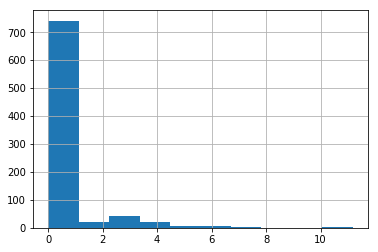

In [55]:
data['end_of_fade_in'].hist(); # what does this even mean though


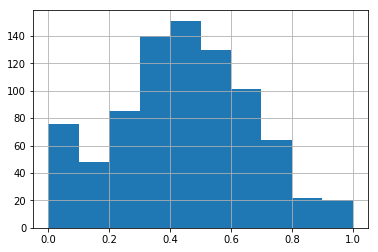

In [57]:
data['key_confidence'].hist() # what does this even mean

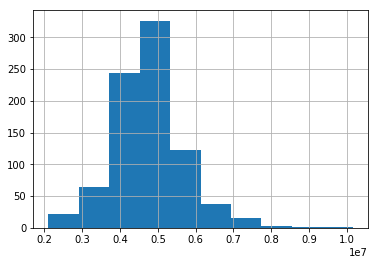

In [59]:
data['num_samples'].hist() # what does this mean

In [60]:
pickle.dump(artists_df, open('data/artists_df_dummied.pkl', 'wb'))

NTS: there are more features about the artist that you can get from the APi but thats for later when i have more time